<a href="https://colab.research.google.com/github/suulee/Machine-learning/blob/master/assignment04/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment04**
Name: Lee Suyoung


Student ID: 20164111

## **0. Install the package**



In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

## **1. Input the data**

1.1 Load the data

In [2]:
uploaded=files.upload()

Saving data_test.csv to data_test.csv
Saving data_train.csv to data_train.csv


1.2 set the trainning data

In [0]:
path = "data_train.csv"

data = np.genfromtxt(path, delimiter=',')

len_train=len(data)
x_train = data[:,0:3]
y_train = []

for i in range(len_train):
  temp=[data[i,3]]
  y_train.append(temp)

1.3 set the testing data

In [0]:
path = "data_test.csv"

data = np.genfromtxt(path, delimiter=',')

len_test=len(data)
x_test = data[:,0:3]
y_test = []

for i in range(len_test):
  temp=[data[i,3]]
  y_test.append(temp)

## **2. Relinear regression**

2.1 Set the variables

In [0]:
theta0=tf.Variable(tf.random_normal([1],name='bias'))
theta1=tf.Variable(tf.random_normal([3,1],name='weight'))

X=tf.placeholder(tf.float32,shape=[None,3])
Y=tf.placeholder(tf.float32,shape=[None,1])

# variables for history of each variables
theta0_history=[]
theta1_history=[]
cost_history=[]
cost_test_history=[]


## hypothesis X*theta1+theta0
hypothesis= tf.matmul(X,theta1)+theta0

2.2 Cost function and Gradient descent



In [0]:
## Cost/loss function
cost= 0.5*tf.reduce_mean(tf.square(hypothesis-Y))

## Minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

2.3 Fit the data

In [0]:
## Launch the graph in a session
sess=tf.Session()

## Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(9001):
    ## optimization using training data
    theta0_val,theta1_val,cost_val,_=sess.run([theta0,theta1,cost,train], feed_dict={X:x_train, Y:y_train})
    # save the history (train data)
    temp=[]
    temp.extend(theta1_val[0])
    temp.extend(theta1_val[1])
    temp.extend(theta1_val[2])

    theta0_history.extend(theta0_val)
    theta1_history.append(temp)
    cost_history.append(cost_val)

    ## find cost using testing data
    cost_test_val=sess.run(cost, feed_dict={X:x_test, Y:y_test})
    # save the cost value (test data)
    cost_test_history.append(cost_test_val) 

2.4 plotting the estimated parameters

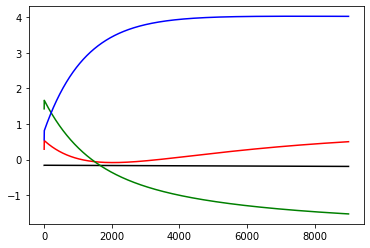

In [8]:
W1=[]
W2=[]
W3=[]
for i in theta1_history:
  W1.append(i[0])
  W2.append(i[1])
  W3.append(i[2])

plt.plot(theta0_history,color='black')
plt.plot(W1,color='red')
plt.plot(W2,color='green')
plt.plot(W3,color='blue')

plt.show()

2.5 plotting the training error

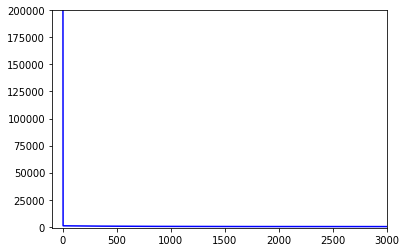

In [9]:
plt.plot(cost_history,color='blue')
plt.axis([-100,3000,-1000,200000])
plt.show()

2.6 plotting the testing error

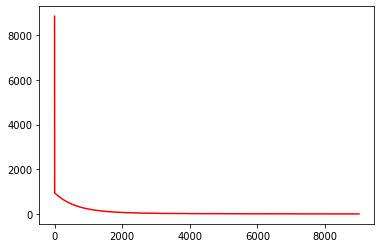

In [10]:
plt.plot(cost_test_history,color='red')
plt.show()